<a href="https://colab.research.google.com/github/betuldanismaz/HarmonicRegression/blob/main/HarmonicRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
# Parameter values based on ID numbers
n1, n2, n3 = 9, 8, 1
a = n1 + n2 + n3
b = 10 * (n1 + n2 + n3)
c = np.radians(n1 + n2 + n3)  # Convert to radians
d = 2 * n1 - n2 + n3

# Harmonic parameters
harmonic_ratio = 0.3  # Strength of the harmonic wave
high_freq_factor = 3   # Multiplier for higher-frequency component

# Function to generate the target signal with harmonics
def target_function(x):
    primary_wave = a * np.cos(b * x + c) + d  # Base cosine wave
    harmonic_wave = harmonic_ratio * a * np.cos(high_freq_factor * b * x + c)  # Harmonic wave
    return primary_wave + harmonic_wave  # Combine primary + harmonic wave

# Generate training and testing data
np.random.seed(42)  # Ensure reproducibility
x_training = np.random.uniform(-2 * np.pi, 2 * np.pi, 200)
x_testing  = np.random.uniform(-2 * np.pi, 2 * np.pi, 20)

# Compute target values
y_training = target_function(x_training)
y_testing = target_function(x_testing)



In [ ]:
import numpy as np

def add_fourier_noise(signal, noise_level=0.2, keep_dc=True, high_freq_boost=0):
    """
    Adds frequency-domain noise to a cosine signal using Fourier Transform.

    Parameters:
    - signal: Original time-domain signal (numpy array).
    - noise_level: Strength of the noise (default=0.2).
    - keep_dc: If True, keeps the DC component (average value of signal) unchanged.
    - high_freq_boost: If >0, adds more noise to higher frequencies for stronger distortion.

    Returns:
    - The noisy signal transformed back into the time domain.
    """

    # Step 1: Compute the Fourier Transform
    fft_signal = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal))  # Frequency spectrum

    # Step 2: Generate noise in the frequency domain
    noise = noise_level * np.random.normal(size=fft_signal.shape)  # Gaussian noise
    phase_noise = np.exp(1j * np.random.uniform(0, 2 * np.pi, size=fft_signal.shape))  # Random phase shifts

    # Optional: Add more noise to higher frequencies for stronger distortion
    if high_freq_boost > 0:
        noise *= (1 + high_freq_boost * np.abs(frequencies))

    # Step 3: Inject noise into frequency domain
    fft_signal_noisy = fft_signal + noise * phase_noise

    # Preserve DC component (average value of the signal)
    if keep_dc:
        fft_signal_noisy[0] = fft_signal[0]

    # Step 4: Convert back to the time domain
    noisy_signal = np.fft.ifft(fft_signal_noisy).real

    return noisy_signal



In [ ]:
# Compute clean target values
y_training_clean = target_function(x_training)
y_testing_clean = target_function(x_testing)

# Apply Fourier-based noise
y_training_noisy = add_fourier_noise(y_training_clean, noise_level=0.3, high_freq_boost=0.5)
y_testing_noisy = add_fourier_noise(y_testing_clean, noise_level=0.3, high_freq_boost=0.5)



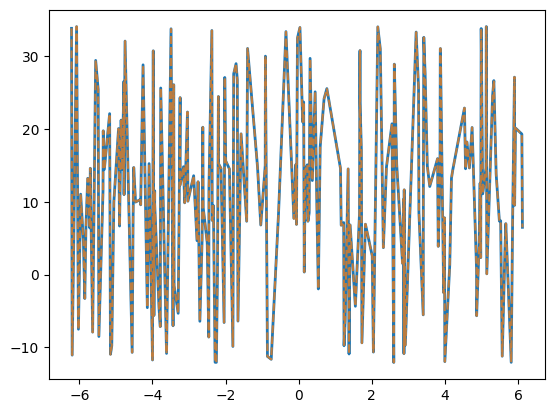

In [ ]:
sorted_indices = np.argsort(x_training)
x_training_sorted = x_training[sorted_indices]
y_training_clean_sorted = y_training_clean[sorted_indices]
y_training_noisy_sorted = y_training_noisy[sorted_indices]

plt.plot(x_training_sorted, y_training_clean_sorted, label="Original Target Signal", linewidth=2)
plt.plot(x_training_sorted, y_training_noisy_sorted, label="Noisy Signal (Fourier)", linestyle="dashed", alpha=0.7)


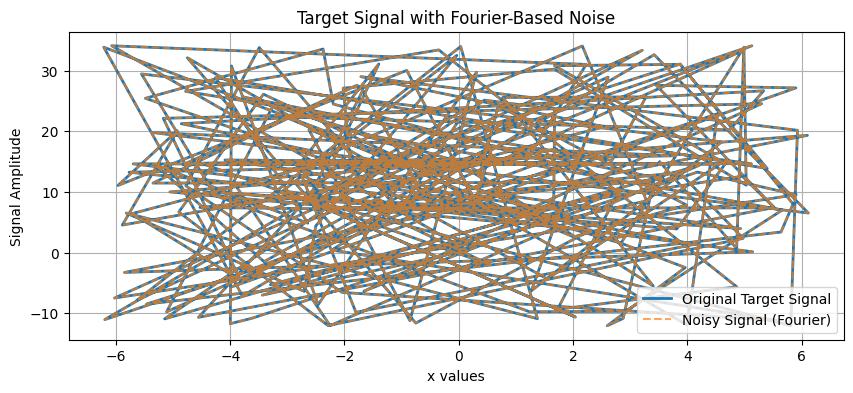

In [ ]:
import matplotlib.pyplot as plt

# Use training x-values for visualization
t = x_training  # Use x_training since it's our generated x-values

# Generate clean target signal using the defined function
y_clean = target_function(t)

# Apply Fourier-based noise
y_noisy = add_fourier_noise(y_clean, noise_level=0.1, high_freq_boost=0.2)


# Plot original and noisy signals
plt.figure(figsize=(10, 4))
plt.plot(t, y_clean, label="Original Target Signal", linewidth=2)
plt.plot(t, y_noisy, label="Noisy Signal (Fourier)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.title("Target Signal with Fourier-Based Noise")
plt.xlabel("x values")
plt.ylabel("Signal Amplitude")
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Fourier Transform and visualize frequency components
def plot_fourier(signal, title="Fourier Spectrum"):
    fft_signal = np.fft.fft(signal)  # Compute FFT
    frequencies = np.fft.fftfreq(len(signal))  # Get frequency components

    plt.figure(figsize=(10, 4))
    plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal[:len(fft_signal)//2]), 'b')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()


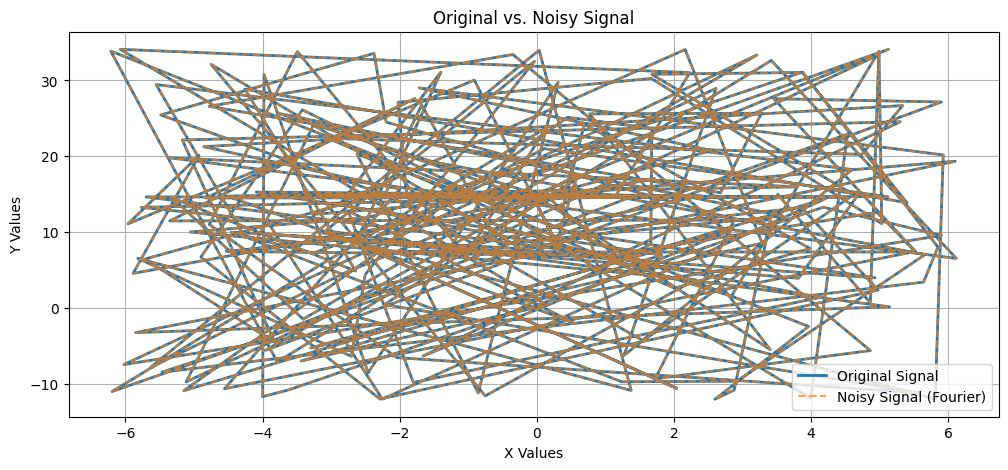

In [ ]:
# Generate clean signal
y_training_clean = target_function(x_training)

# Apply Fourier-based noise
y_training_noisy = add_fourier_noise(y_training_clean, noise_level=0.2)

# Plot Original vs Noisy Signal
plt.figure(figsize=(12, 5))
plt.plot(x_training, y_training_clean, label="Original Signal", linewidth=2)
plt.plot(x_training, y_training_noisy, label="Noisy Signal (Fourier)", linestyle="dashed", alpha=0.7)
plt.legend()
plt.title("Original vs. Noisy Signal")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid()
plt.show()


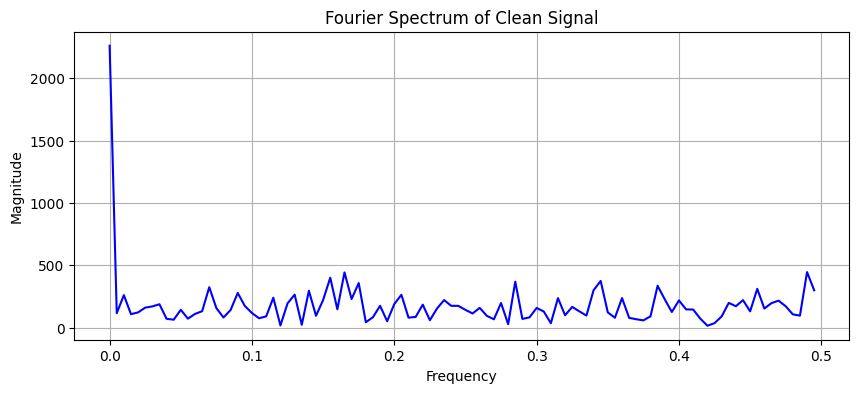

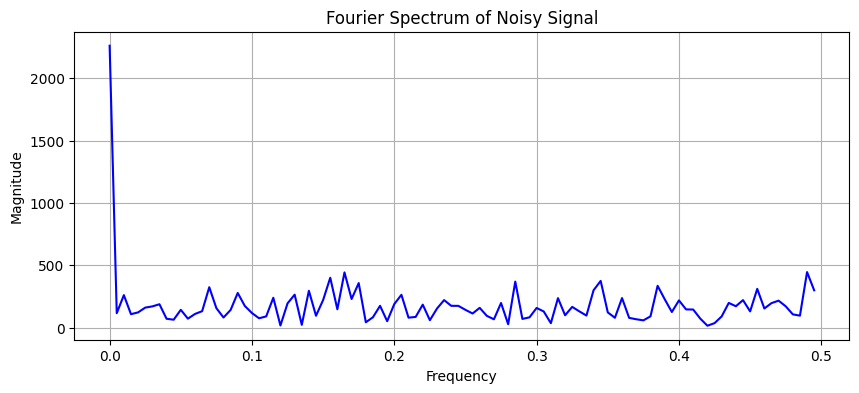

In [ ]:
# Plot Fourier Spectrum of Clean and Noisy Signal
plot_fourier(y_training_clean, "Fourier Spectrum of Clean Signal")
plot_fourier(y_training_noisy, "Fourier Spectrum of Noisy Signal")


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) # Creating l0 # Expects one neuron and one input

# Creating the model
model_basic = keras.Sequential([
    l0, # Using l0
    layers.Dense(1, input_shape=[1])
])

# Compiling the model
model_basic.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

# Training the model
history_basic = model_basic.fit(x_training, y_training, epochs=500, verbose=1)
print("Finished training the model")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 317.7081
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 265.3622 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 245.8898  
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 203.2515 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 185.2892 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 165.3944 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.2005 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 167.1233 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 174.2710 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 158.8163 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 165.7309 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 157.3753  
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164.7391 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 166.9354 
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - lo

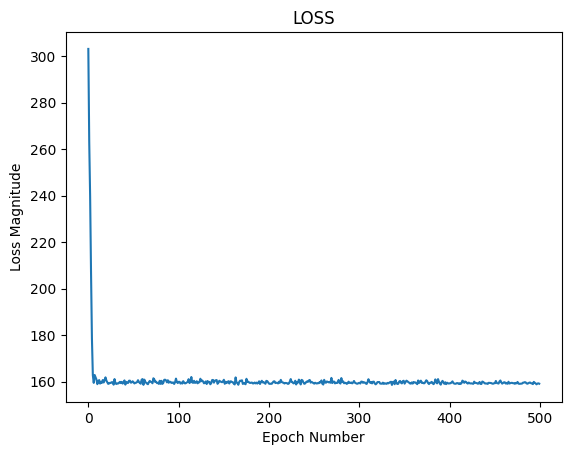

In [ ]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_basic.history['loss'])
plt.show()

In [ ]:
print(history_basic.history)


{'loss': [303.0854797363281, 263.1744384765625, 239.6716766357422, 206.85838317871094, 178.42848205566406, 162.71310424804688, 159.46290588378906, 162.84938049316406, 161.89682006835938, 160.87600708007812, 158.9029083251953, 160.1745147705078, 160.64901733398438, 159.15301513671875, 159.9259033203125, 159.46353149414062, 160.67794799804688, 159.6281280517578, 160.64031982421875, 161.82501220703125, 160.42367553710938, 159.6876678466797, 159.02769470214844, 159.2044677734375, 159.46820068359375, 159.4346466064453, 159.7568359375, 159.73756408691406, 158.67959594726562, 161.09725952148438, 159.32733154296875, 158.98385620117188, 159.22325134277344, 159.15965270996094, 159.5204315185547, 159.90142822265625, 159.35992431640625, 159.87826538085938, 159.15679931640625, 159.61940002441406, 160.52084350585938, 158.70599365234375, 159.8748321533203, 159.45062255859375, 159.42649841308594, 160.3678741455078, 160.41014099121094, 159.56788635253906, 159.6259002685547, 160.13958740234375, 159.7521

In [ ]:
#predictions for each training data point
predictions = model_basic.predict(x_training)

for i in range(len(x_training)):
    print(f"Prediction for x_training[{i}] ({x_training[i]:.4f}): {predictions[i][0]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction for x_training[0] (-1.5766): 11.3648
Prediction for x_training[1] (5.6638): 11.4190
Prediction for x_training[2] (2.9153): 11.3984
Prediction for x_training[3] (1.2398): 11.3859
Prediction for x_training[4] (-4.3226): 11.3442
Prediction for x_training[5] (-4.3229): 11.3442
Prediction for x_training[6] (-5.5533): 11.3350
Prediction for x_training[7] (4.6015): 11.4111
Prediction for x_training[8] (1.2706): 11.3861
Prediction for x_training[9] (2.6147): 11.3962
Prediction for x_training[10] (-6.0245): 11.3314
Prediction for x_training[11] (5.9051): 11.4208
Prediction for x_training[12] (4.1776): 11.4079
Prediction for x_training[13] (-3.6149): 11.3495
Prediction for x_training[14] (-3.9983): 11.3466
Prediction for x_training[15] (-3.9785): 11.3468
Prediction for x_training[16] (-2.4600): 11.3581
Prediction for x_training[17] (0.3111): 11.3789
Prediction for x_training[18] (-0.8552): 11.3702
Prediction for x_training[19] (-2.6235): 11.3569
P

In [ ]:
#predictions for each testing data point
predictions = model_basic.predict(x_testing)

for i in range(len(x_testing)):
    print(f"Prediction for x_testing[{i}] ({x_testing[i]:.4f}): {predictions[i][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction for x_testing[0] (1.7848): 11.3900
Prediction for x_testing[1] (-5.2259): 11.3374
Prediction for x_testing[2] (-4.2521): 11.3447
Prediction for x_testing[3] (5.0084): 11.4141
Prediction for x_testing[4] (1.3374): 11.3866
Prediction for x_testing[5] (-6.1676): 11.3303
Prediction for x_testing[6] (-5.0081): 11.3390
Prediction for x_testing[7] (2.0546): 11.3920
Prediction for x_testing[8] (-6.2196): 11.3300
Prediction for x_testing[9] (-4.2624): 11.3446
Prediction for x_testing[10] (0.6124): 11.3812
Prediction for x_testing[11] (2.4114): 11.3947
Prediction for x_testing[12] (1.9096): 11.3909
Prediction for x_testing[13] (-3.4649): 11.3506
Prediction for x_testing[14] (2.6663): 11.3966
Prediction for x_testing[15] (-3.3018): 11.3518
Prediction for x_testing[16] (-2.1941): 11.3601
Prediction for x_testing[17] (3.0975): 11.3998
Prediction for x_testing[18] (1.8803): 11.3907
Prediction for x_testing[19] (4.3885): 11.4095


In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.01048598]], dtype=float32), array([3.491281], dtype=float32)]


# **Karmaşık Model**

In [ ]:
# Creating the complex model
model_complex = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),  # First layer: 64 neurons, using 'relu' activation function
    layers.Dense(128, activation='relu'), # Second layer: 128 neurons
    layers.Dense(64, activation='relu'),  # Third layer: 64 neurons
    layers.Dense(32, activation='relu'),  # Fourth layer: 32 neurons
    layers.Dense(1) # Output layer: Specifies the model output, single output value so 1 layer
])

# Compiling the model
model_complex.compile(loss='mean_squared_error',
                      optimizer=tf.keras.optimizers.Adam(0.001))

# Training the model
history_complex = model_complex.fit(x_training, y_training, epochs=1000, verbose=1)

print("Finished training the model")

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 296.2498
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 269.8128 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 267.2834 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 237.6937 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 194.9064  
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 183.7431 
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 182.1276 
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 200.3834 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 192.2466 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 187.0278  
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 184.1014 
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 178.6915 
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 202.4259 
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 179.4359 
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
#predictions for each training data point
predictions = model_complex.predict(x_training)

for i in range(len(x_training)):
    print(f"Prediction for x_training[{i}] ({x_training[i]:.4f}): {predictions[i][0]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction for x_training[0] (-1.5766): 16.3225
Prediction for x_training[1] (5.6638): 13.2359
Prediction for x_training[2] (2.9153): 11.4564
Prediction for x_training[3] (1.2398): 7.1013
Prediction for x_training[4] (-4.3226): 10.4359
Prediction for x_training[5] (-4.3229): 10.4360
Prediction for x_training[6] (-5.5533): 10.4334
Prediction for x_training[7] (4.6015): 12.5491
Prediction for x_training[8] (1.2706): 7.2180
Prediction for x_training[9] (2.6147): 11.2595
Prediction for x_training[10] (-6.0245): 10.4263
Prediction for x_training[11] (5.9051): 13.3919
Prediction for x_training[12] (4.1776): 12.2750
Prediction for x_training[13] (-3.6149): 10.2769
Prediction for x_training[14] (-3.9983): 10.3740
Prediction for x_training[15] (-3.9785): 10.3690
Prediction for x_training[16] (-2.4600): 10.2157
Prediction for x_training[17] (0.3111): 17.7389
Prediction for x_training[18] (-0.8552): 9.0723
Prediction for x_training[19] (-2.6235): 10.0551
Pred

In [ ]:
#predictions for each testing data point
predictions = model_complex.predict(x_testing)

for i in range(len(x_testing)):
    print(f"Prediction for x_testing[{i}] ({x_testing[i]:.4f}): {predictions[i][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Prediction for x_testing[0] (1.7848): 9.4817
Prediction for x_testing[1] (-5.2259): 10.4380
Prediction for x_testing[2] (-4.2521): 10.4274
Prediction for x_testing[3] (5.0084): 12.8121
Prediction for x_testing[4] (1.3374): 7.5034
Prediction for x_testing[5] (-6.1676): 10.4265
Prediction for x_testing[6] (-5.0081): 10.4408
Prediction for x_testing[7] (2.0546): 10.4794
Prediction for x_testing[8] (-6.2196): 10.4276
Prediction for x_testing[9] (-4.2624): 10.4291
Prediction for x_testing[10] (0.6124): 17.6318
Prediction for x_testing[11] (2.4114): 11.1264
Prediction for x_testing[12] (1.9096): 9.9886
Prediction for x_testing[13] (-3.4649): 10.2382
Prediction for x_testing[14] (2.6663): 11.2933
Prediction for x_testing[15] (-3.3018): 10.1962
Prediction for x_testing[16] (-2.1941): 11.8967
Prediction for x_testing[17] (3.0975): 11.5751
Prediction for x_testing[18] (1.8803): 9.8791
Prediction for x_testing[19] (4.3885): 12.4113


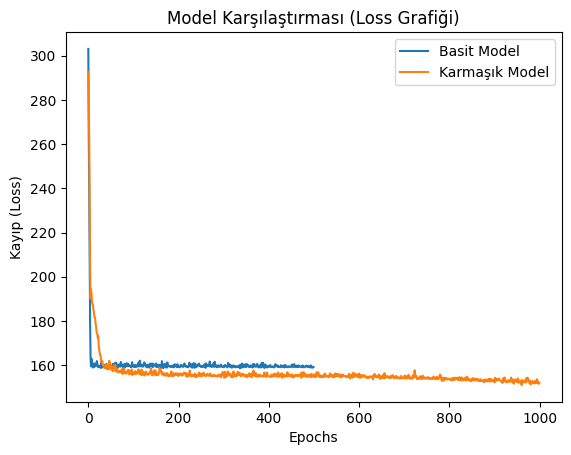

In [ ]:
# Loss graphs
plt.plot(history_basic.history["loss"], label="Basic Model")
plt.plot(history_complex.history["loss"], label="Complex Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Comparison (Loss Graph)")
plt.show()


References:

https://keras.io/api/models/model_training_apis/

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

https://keras.io/api/layers/core_layers/dense/

https://keras.io/guides/sequential_model/

https://stackoverflow.com/questions/44907377/what-is-epoch-in-keras-models-model-fit?newreg=8dc34c808a114c1f8458b85504f96829

https://www.youtube.com/playlist?list=PL3ED48mWmYxrAdWjQlOWzFNaM4gLgry5T

https://www.youtube.com/watch?v=29ZQ3TDGgRQ

https://www.geeksforgeeks.org/plotting-sine-and-cosine-graph-using-matloplib-in-python/

https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python

https://www.youtube.com/watch?v=F4myI-9GJ7U

https://www.youtube.com/watch?v=GKsCWivmlHg